In [1]:
import pandas as pd
import string
import nltk
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# working knowledge of plotly is depreciated :(
# import plotly.graph_objs as go
# import chart_studio.plotly as py
# from plotly.offline import iplot, init_notebook_mode

# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

In [2]:
%store -r
reviews = pd.read_csv('_review_data.csv')
print(reviews.columns)
text = text
print(text.columns)
text['description'][6]

Index(['Unnamed: 0', 'description', 'two_outcomes'], dtype='object')
Index(['description', 'taster', 'points'], dtype='object')


"here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. it's balanced with fresh acidity and soft tannins."

In [3]:
def tokenize(text, punct = False, lower = False):
    """ 
    Accepts a df with a column named 'description' 
    If 'punct' function also sorts out punctuation
    If 'lower' function also converts all words to lowercase
    """
    if lower:
        text.description = text.description.lower()
    
    words = []
    for line in text.description:
        words.append(list(line.split()))
    text['tokenized'] = words
    
    if punct:
        punct = string.punctuation
        print('removing punctuation...')
        words = []
        punct_table = str.maketrans('','', punct)
        for line in text.tokenized:
            line = [w.translate(punct_table) for w in line]
            words.append(line)
    print(words[0])
    text['tokenized'] = words
    return text

In [4]:
text_tokened = tokenize(text, punct = True)
text_tokened.head(1)

removing punctuation...
['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'and', 'dried', 'herb', 'the', 'palate', 'isnt', 'overly', 'expressive', 'offering', 'unripened', 'apple', 'citrus', 'and', 'dried', 'sage', 'alongside', 'brisk', 'acidity']


,description,taster,points,tokenized
0,"aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,87,"[aromas, include, tropical, fruit, broom, brim..."


<h4> Tokenizing with nltk </h4>

In [5]:
def tokenize_nltk(text, stem = False, stop_words = False, isalpha = False):
    """
    Accepts a df with a column named 'description' containing a string.
    optional arguments apply further tansformations
    """

    words = []
    for line in text.description:
        new_line = nltk.word_tokenize(line)
        words.append(new_line)

    text['tokenized'] = words
    
    # strips punctuation
    if isalpha:
        words = []
        for line in text.tokenized:
            
            line = [word for word in line if word.isalpha()]
            words.append(line)
    text['tokenized'] = words

    # strips stop words
    if stop_words:
        stop_words = nltk.corpus.stopwords.words('english')
        words = []
        for line in text.tokenized:
            line = [word for word in line if not word in stop_words]
            words.append(line)
    text['tokenized'] = words
    
    # converts words to stems ~under construction~
    if stem:
        pass
    
    total_vocabulary = set(word for line in text.tokenized for word in line)

    print(f'Total Vocab: {len(total_vocabulary)}')
    return total_vocabulary, text

In [7]:
tot, nltk_tokenized = tokenize_nltk(text, stop_words=True, isalpha=True)
nltk_tokenized['tokenized'][0]

Total Vocab: 29534


['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity']

In [8]:
glove_dir = r'C:\Users\Mark\Documents\DataSci\glove_dir\glove.6B.50d.txt' #r prefix converts from a normal string to a raw string
glove = {}
with open(glove_dir, 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in tot:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector
print(f'Found {len(glove)} word vectors.')

Found 23626 word vectors.


In [9]:
print(f'{round(( len(glove)/len(tot) *100),2)}% word coverage')

80.0% word coverage


In [10]:
len(glove['coffee'])

50

In [11]:
import gensim

In [12]:
from gensim.models import Word2Vec, word2vec
import os

In [13]:
model_name = 'w2v_train_model'
# Set values for various word2vec parameters
num_features = 50    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 3          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words
if not os.path.exists(model_name): 
    # Initialize and train the model (this will take some time)
    w2v_model = word2vec.Word2Vec(stop_removed_text, workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling)

    # If you don't plan to train the model any further, calling 
    # init_sims will make the model much more memory-efficient.
    w2v_model.init_sims(replace=True)

    # It can be helpful to create a meaningful model name and 
    # save the model for later use. You can load it later using Word2Vec.load()
    w2v_model.save(model_name)
else:
    w2v_model = Word2Vec.load(model_name)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
w2v_model.wv.most_similar('coffee')

In [ ]:
w2v_model.wv.most_similar('brimstone')

In [ ]:
w2v_model.wv.doesnt_match(["vanilla", "chocolate", "cinnamon", "savory"])

In [ ]:
word_index = set(w2v_model.wv.index2word)

In [ ]:
%store w2v_model

<h2> Visualization of Words </h2>

<h3> PCA Vectors </h3>

This lexicon outputs vectors that are (50,) <br>
each vector is a feature <br =>
we can visualize 3 vectors/dimentions easily <br>
50 dimentions --> PCA F(x) --> 3 dimensions <br>

In [14]:
test_df = text.head(2)
test_df

,description,taster,points,tokenized
0,"aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,87,"[aromas, include, tropical, fruit, broom, brim..."
1,"this is ripe and fruity, a wine that is smooth...",Roger Voss,87,"[ripe, fruity, wine, smooth, still, structured..."


In [15]:
test_dict = {"a": [1, "first"]}
test_dict['a'].append('apple')
test_dict

{'a': [1, 'first', 'apple']}

In [16]:
# It might be nice to try and make a model using individual taster's word choice

Voss = text[text.taster == 'Roger Voss']
Schachner = text[text.taster == 'Michael Schachner']
OKeefe = text[text.taster =='Kerin O’Keefe']
Boone = text[text.taster == "Virginie Boone"]
taster_dfs = {"Voss": [Voss], "Schachner": [Schachner], "O'Keefe": [OKeefe], "Virginie Boone": [Boone]}

taster_dfs["Voss"][0].head()

,description,taster,points,tokenized
1,"this is ripe and fruity, a wine that is smooth...",Roger Voss,87,"[ripe, fruity, wine, smooth, still, structured..."
7,this dry and restrained wine offers spice in p...,Roger Voss,87,"[dry, restrained, wine, offers, spice, profusi..."
9,this has great depth of flavor with its fresh ...,Roger Voss,87,"[great, depth, flavor, fresh, apple, pear, fru..."
11,"this is a dry wine, very spicy, with a tight, ...",Roger Voss,87,"[dry, wine, spicy, tight, taut, texture, stron..."
30,red cherry fruit comes laced with light tannin...,Roger Voss,86,"[red, cherry, fruit, comes, laced, light, tann..."


In [17]:
def appears_in(df):
    """
    takes a list of token words and gets the glove vectors for each,
    then saves the vectors to a new dictionary
    """
    output = {}
    for i in df['tokenized']:
        for word in i:
            if (word not in output.keys()) and (word in glove):
                output[word] = glove[word]
    return output

In [ ]:
test_array = appears_in(test_df)
test_array.keys()
glove['2016'] is test_array['2016']

In [18]:
def vec_to_cols(vector_array_dict):
    """
    helper function for get_pca
    Turns a dictionary containing array into a dataframe of vectors as columns.
    """
    data = np.array(list(vector_array_dict.values()))
    vector_cols = pd.DataFrame(data=data, index=vector_array_dict.keys())
    return vector_cols

In [ ]:
vector_columns = vec_to_cols(test_array)
vector_columns.head(2)

In [19]:
from sklearn.decomposition import PCA

In [20]:

def get_pca(dict_of_arrays, normalize = False, components = 3):
    """
    PCA set for 3 dimentions.
    If normalize, vectors are fit to sklearn.preprocessing.StandardScaler()
    """
    if normalize:
        vector_cols = StandardScaler().fit_transform(vec_to_cols(dict_of_arrays))
    else:
        vector_cols = vec_to_cols(dict_of_arrays)
        
#     get pca
    pca = PCA(n_components = components)
    princip_components = pca.fit_transform(vector_cols)
    cols = ['PC' + str(i+1) for i in range(princip_components.shape[1])]
    pca_df = pd.DataFrame(data = princip_components, columns = cols, index = dict_of_arrays.keys())
    return pca_df

In [ ]:
pca_vec = get_pca(test_array)

In [ ]:
pca_vec.head(2)

In [ ]:
pca_vec['PC1'].values

<h3> Viewing the Data </h3>

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_pca(df_list, plot_list, 
             xyz = None,
             figsize = (12, 14),
             azim = 60, 
             elev = 30,
             alpha = None,
             prismXYZ = None,
             legend = False,
             title = None):
    '''
    Draws a flexible figure of subplots, with as many as are listed
    in the plot list of dictionaries. Each subplot can have one or more
    scatters drawn together depending on how many key/val pairs are in
    the dict.
    Parameters:
    df (pd.DataFrame) Needs columns for 'PC1', 'PC2', and 'PC3.'
    plot_list (list) List of dictionaries. Each dict is a subplot with as many 
    scatters as there are key/val pairs in the dict. E.g. for one plot with one scatter,
    use a list with 1 dict with 1 key/val pair.
    xyz (list) List of limits for the three dimensions.
    figsize (tuple) Size of figure.
    azim (int): Horizontal view of the plot.
    elev (int): Vertical view of the plot.
    alpha (float): Value between 0 and 1. Transparency of scatters.
    prismXYZ (dict): Dict with prism names as keys and dimension lists as values.
    legend (bool): True if a legend should be drawn.
    title (str): Title of plot (only really if just one plot being shown.)
    
    Returns: 
    Draws a plot.
    '''
    #Get xyz limits for the plots.
    if xyz:
        xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    
    #Get right number of rows whether length is even or odd.
    #Needed this instead of just rounding because of 'banker's rounding.'
    rows = (len(plot_list) // 2) + (len(plot_list) % 2)

    #Set columns. 1 if 1 plot, else 2.
    if len(plot_list) == 1:
        cols = 1
    else:
        cols = 2
    #Draw figure to hold all plots
    fig = plt.figure(figsize = figsize)    
    
    #Draw a subplot for each dict in the plot list.
    #If just one subplot should be drawn, put just one dict in the list.
    #The plot will fill the figure.
    for i in range(len(plot_list)): 
        ax = fig.add_subplot(rows, cols, (i + 1), 
                             projection='3d', 
                             azim = azim, 
                             elev = elev)
        if xyz: 
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            ax.set_zlim(zmin, zmax)
        
        #Draw each scatter within a subplot. 1 for each key/val pair in the dict.
        #(Allows for each subplot to show one or more scatters.)
        #together.
        for taster in  len(df_list):
            #Pull the data from the df corresponding to each label
            current_taster = df_list[taster]
            pca = current_taster.values()
            #Draw a scatter for the data from each label
            ax.scatter(xs = pca['PC1'], 
                       ys = pca['PC2'], 
                       zs = pca['PC3'],
                       c = color,
                       alpha = alpha,
                       label = ('Taster ' + str(taster)))
        
        #Draw prisms
        if prismXYZ:
            #Draw each prism in list
            #Leaving prismXYZ as a dict for the moment in case I want to use labels
            for label, xyz in prismXYZ.items():
                draw_prism(xyz, 'black')
        
            
        #Label axes for each subplot
        ax.set_xlabel('x, PC1')
        ax.set_ylabel('y, PC2')
        ax.set_zlabel('z, PC3')
        
        #Set legend for each subplot
        if legend:
            plt.legend()
        #Set title for each subplot
        if not title:
            plt.title('Chapters: ' + str(list(plot_list[i].keys())))
        else:
            plt.title(title)
    plt.show()
    
def isolate(df, xyz):
    '''
    Parameters:
    df (pd.DataFrame) Needs a 'label' column to work. Needs PC1, 2, and 3 columns.
    xyz (list) List of limits for PC1, 2, and 3.
   
    Returns:
    blob_df (pd.DataFrame) Section of the pca_df within the 
    spatial limits set by the parameters. The 'blob' within 
    a 'cube' on a 3d plot.
    '''
    xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    
    blob = df[
                    ((df['PC1'] > xmin) & (df['PC1'] < xmax )) & \
                    ((df['PC2'] > ymin) & (df['PC2'] < ymax )) & \
                    ((df['PC3'] > zmin) & (df['PC3'] < zmax ))
                ]
    return blob

def draw_prism(xyz, color):
    '''
    When called within plot_pca, draws a prism in a 3d plot.
    Works well with isolate() to visualize the isolated tokens.
    '''
    #1 .   2 .   3 .   4 .   5 .  6
    xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    c = color
    plt.plot([], [], [], color = c)
    
    kwargs = {'linewidth': 4}
    
    #I tried a lot of ways of consolidating these loops further
    #but decided to move on.
    #x limits at zmin
    for x in [xmin, xmax]:
        plt.plot([x, x], [ymin, ymax], [zmin, zmin], color = c, **kwargs)

    #y limits at zmin
    for y in [ymin, ymax]:
        plt.plot([xmin, xmax], [y, y], [zmin, zmin], color = c, **kwargs)

    #x limits at zmax
    for x in [xmin, xmax]:
        plt.plot([x, x,], [ymin, ymax,], [zmax, zmax], color = c, **kwargs)

    #y limits at zmax
    for y in [ymin, ymax]:
        plt.plot([xmin, xmax], [y, y], [zmax, zmax], color = c, **kwargs)

    #z limits
    for x in [xmin, xmax]:
        for y in [ymin, ymax]:
            plt.plot([x, x], [y, y], [zmin, zmax], color = c, **kwargs)
            
    #Draw label
    #ax.text(xmax, ymax, zmin, s = label)

In [ ]:
taster_dfs.keys()

In [28]:
total_words = appears_in(taster_dfs['Schachner'][0])
taster_dfs['Schachner'].append(total_words)
len(taster_dfs['Schachner'][1])
taster_dfs['Schachner'].append(get_pca(taster_dfs['Schachner'][1]))
Schachner_pca = taster_dfs['Schachner'][2]

total_words = appears_in(taster_dfs['Voss'][0])
taster_dfs['Voss'].append(total_words)
len(taster_dfs['Voss'][1])
taster_dfs['Voss'].append(get_pca(taster_dfs['Voss'][1]))
Voss_pca = taster_dfs['Voss'][2]

total_words = appears_in(taster_dfs["O'Keefe"][0])
taster_dfs["O'Keefe"].append(total_words)
len(taster_dfs["O'Keefe"][1])
taster_dfs["O'Keefe"].append(get_pca(taster_dfs["O'Keefe"][1]))
Okeefe_pca = taster_dfs["O'Keefe"][2]

total_words = appears_in(taster_dfs['Virginie Boone'][0])
taster_dfs['Virginie Boone'].append(total_words)
len(taster_dfs['Virginie Boone'][1])
taster_dfs['Virginie Boone'].append(get_pca(taster_dfs['Virginie Boone'][1]))
Boone_pca = taster_dfs['Virginie Boone'][2]

In [35]:
df_list = [Boone_pca, Okeefe_pca, Schachner_pca, Voss_pca]

In [50]:
Schachner_pca

{'blackberry': array([ 0.71505  , -0.38024  ,  0.67311  ,  1.7775   , -0.61982  ,
        -0.0091148, -0.66186  , -0.94117  ,  1.4219   ,  0.79456  ,
         0.096418 ,  0.47984  ,  1.0431   , -0.46042  , -0.27657  ,
         0.47485  , -2.15     ,  0.36049  ,  0.90065  , -0.52124  ,
         0.019205 , -0.47554  ,  0.46002  ,  0.28952  ,  0.67052  ,
        -0.7035   ,  0.50427  ,  0.31447  ,  0.38194  , -0.83432  ,
         1.2854   ,  0.002204 , -0.83908  ,  1.2497   ,  0.24245  ,
        -0.52163  , -0.92787  , -0.37506  , -0.87747  , -0.67346  ,
         0.7466   ,  0.32303  , -1.1052   ,  0.10136  ,  0.82164  ,
         0.16328  ,  0.85507  , -0.039019 , -0.15838  , -0.40956  ],
       dtype=float32),
 'raspberry': array([-0.70209 ,  0.89056 , -0.95276 ,  1.5387  ,  0.41261 ,  0.55814 ,
        -0.020612,  0.1976  ,  0.31758 ,  0.82955 , -0.27989 ,  0.369   ,
         1.5781  ,  0.59731 , -0.13124 , -1.2104  , -0.85947 ,  0.51642 ,
         0.11117 , -1.2524  , -0.25874 , -1.029

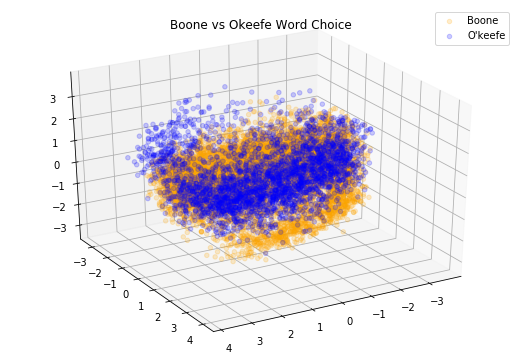

In [43]:


xyz = None
figsize = (20, 14)
azim = 60 
elev = 30
alpha = .2
prismXYZ = None
legend = False
title = None

fig = plt.figure(figsize = figsize)    

#Draw a subplot for each dict in the plot list.
#If just one subplot should be drawn, put just one dict in the list.
#The plot will fill the figure.
 
ax = fig.add_subplot(2,2,1, 
                     projection='3d', 
                     azim = azim, 
                     elev = elev)
if xyz: 
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
        
ax.scatter(xs = Boone_pca['PC1'].values, 
           ys = Boone_pca['PC2'].values, 
           zs = Boone_pca['PC3'].values,
           c = 'orange',
           alpha = alpha,
           label= 'Boone')
ax.scatter(xs = Okeefe_pca['PC1'].values, 
           ys = Okeefe_pca['PC2'].values, 
           zs = Okeefe_pca['PC3'].values,
           c = 'blue',
           alpha = alpha,
           label = "O'keefe")


plt.legend()


plt.title('Boone vs Okeefe Word Choice')

plt.show();

KeyError: 'PC1'

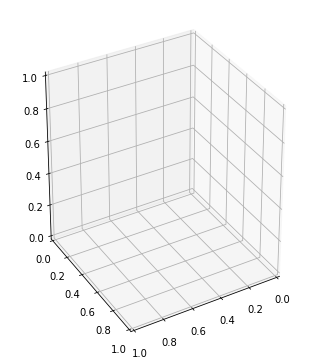

In [44]:


xyz = None
figsize = (12, 14)
azim = 60 
elev = 30
alpha = .2
prismXYZ = None
legend = False
title = None

fig = plt.figure(figsize = figsize)    

#Draw a subplot for each dict in the plot list.
#If just one subplot should be drawn, put just one dict in the list.
#The plot will fill the figure.
 
ax = fig.add_subplot(2,2,1, 
                     projection='3d', 
                     azim = azim, 
                     elev = elev)
if xyz: 
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
        
ax.scatter(xs = Schachner_pca['PC1'].values, 
           ys = Schachner_pca['PC2'].values, 
           zs = Schachner_pca['PC3'].values,
           c = 'orange',
           alpha = alpha,
           label= 'Schachner')
ax.scatter(xs = Voss_pca['PC1'].values, 
           ys = Voss_pca['PC2'].values, 
           zs = Voss_pca['PC3'].values,
           c = 'Voss',
           alpha = alpha,
           label = "O'keefe")


plt.legend()


plt.title('Voss vs Schachner Word Choice')

plt.show();

3d plots of PCAd words to express dimentionality and nearness to other words.  selected for a flavor note and then selected for 'good' or 'bad'

In [ ]:
plot_list = [{1: 'orange', 0: 'purple'}]
plot_pca(pca_vec, plot_list=plot_list)

In [ ]:
if xyz:
        xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    
    #Get right number of rows whether length is even or odd.
    #Needed this instead of just rounding because of 'banker's rounding.'
    rows = (len(plot_list) // 2) + (len(plot_list) % 2)

    #Set columns. 1 if 1 plot, else 2.
    if len(plot_list) == 1:
        cols = 1
    else:
        cols = 2
    #Draw figure to hold all plots
    fig = plt.figure(figsize = figsize)    
    
    #Draw a subplot for each dict in the plot list.
    #If just one subplot should be drawn, put just one dict in the list.
    #The plot will fill the figure.
    for i in range(len(plot_list)): 
        ax = fig.add_subplot(rows, cols, (i + 1), 
                             projection='3d', 
                             azim = azim, 
                             elev = elev)
        if xyz: 
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            ax.set_zlim(zmin, zmax)
        
        #Draw each scatter within a subplot. 1 for each key/val pair in the dict.
        #(Allows for each subplot to show one or more scatters.)
        #together.
        for taster in  len(df_list):
            #Pull the data from the df corresponding to each label
            current_taster = df_list[taster]
            pca = current_taster.values()
            #Draw a scatter for the data from each label
            ax.scatter(xs = pca['PC1'], 
                       ys = pca['PC2'], 
                       zs = pca['PC3'],
                       alpha = alpha,
                       label = ('Taster ' + str(taster)))
        #Set legend for each subplot
        if legend:
            plt.legend()
        #Set title for each subplot
        if not title:
            plt.title('Chapters: ' + str(list(plot_list[i].keys())))
        else:
            plt.title(title)
    plt.show()